<a href="https://colab.research.google.com/github/Rayadi-Ayoub/Syst-me-intelligent-/blob/main/Vision_Transformer_(ViT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# Import du module 'files' de Google Colab
# Ce module permet d'importer (uploader) ou d'exporter (downloader) des fichiers
# entre ton ordinateur local et l'environnement d'exécution Colab.
from google.colab import files


In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayoubrayadi","key":"af8c12c09e43789fa2972aa980a65369"}'}

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("simhadrisadaram/mimic-cxr-dataset")

print("Path to dataset files:", path)

100%|██████████| 16.5G/16.5G [07:33<00:00, 39.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2


In [ ]:
# Définit le chemin de base (base_path) vers le dossier local où est stocké le dataset téléchargé depuis Kaggle.
# Ici, le chemin pointe vers le cache interne de KaggleHub, utilisé par Colab pour stocker les datasets Kaggle.
# Le dossier correspond au dataset "mimic-cxr-dataset" de l’utilisateur "simhadrisadaram", version 2.
base_path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2"


In [ ]:
import os
import pandas as pd


In [ ]:
import os
import pandas as pd

# Définis le chemin de base vers ton dataset
base_path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2"

# Construit le chemin complet vers les fichiers CSV
train_csv = os.path.join(base_path, "mimic_cxr_aug_train.csv")
val_csv = os.path.join(base_path, "mimic_cxr_aug_validate.csv")

# Lit les fichiers CSV
df_train = pd.read_csv(train_csv)
df_val = pd.read_csv(val_csv)

# Affiche la taille (nombre de lignes et colonnes)
print("Train shape:", df_train.shape)
print("Validation shape:", df_val.shape)

# Affiche les 5 premières lignes du DataFrame d'entraînement
df_train.head()


Train shape: (64586, 10)
Validation shape: (500, 10)


,Unnamed: 0.1,Unnamed: 0,subject_id,image,view,AP,PA,Lateral,text,text_augment
0,0,0,10000032,['files/p10/p10000032/s50414267/02aa804e-bde0a...,"['PA', 'LATERAL', 'AP']",['files/p10/p10000032/s53911762/68b5c4b1-227d0...,['files/p10/p10000032/s50414267/02aa804e-bde0a...,['files/p10/p10000032/s50414267/174413ec-4ec4c...,"['Findings: There is no focal consolidation, p...","['Findings: There is no focus, pleural effusio..."
1,1,1,10000764,['files/p10/p10000764/s57375967/096052b7-d256d...,"['AP', 'LATERAL']",['files/p10/p10000764/s57375967/096052b7-d256d...,[],['files/p10/p10000764/s57375967/b79e55c3-735ce...,['Findings: PA and lateral views of the chest ...,['Finds: PA and lateral view of the breast int...
2,2,2,10000898,['files/p10/p10000898/s50771383/0c4eb1e1-b8019...,"['LATERAL', 'PA']",[],['files/p10/p10000898/s50771383/2a280266-c8bae...,['files/p10/p10000898/s50771383/0c4eb1e1-b8019...,['Findings: PA and lateral views of the chest ...,['Finds: PA and side view of the chest provide...
3,3,3,10000935,['files/p10/p10000935/s50578979/d0b71acc-b5a62...,"['AP', 'LATERAL', 'LL', 'PA']",['files/p10/p10000935/s50578979/d0b71acc-b5a62...,['files/p10/p10000935/s55697293/c50494f1-90e2b...,['files/p10/p10000935/s51178377/3be619d1-506a6...,['Findings: Lung volumes remain low. There ar...,['Results: Pulmonary volumes remain low. There...
4,4,4,10000980,['files/p10/p10000980/s50985099/6ad03ed1-97ee1...,"['PA', 'LL', 'AP', 'LATERAL']",['files/p10/p10000980/s51967283/943486a3-b3fa9...,['files/p10/p10000980/s50985099/6ad03ed1-97ee1...,['files/p10/p10000980/s54577367/96f9a77c-59b47...,['Findings: Impression: Compared to chest rad...,['Findings: Impression: Compared to the thorac...


In [ ]:
import ast  # pour convertir la chaîne en liste Python

def extract_image_path(path_str):
    try:
        path_list = ast.literal_eval(path_str)
        if isinstance(path_list, list) and len(path_list) > 0:
            return path_list[0]  # on garde le premier chemin
        else:
            return None
    except:
        return None

df_train['image_path'] = df_train['image'].apply(extract_image_path)
df_val['image_path'] = df_val['image'].apply(extract_image_path)

print(df_train[['subject_id', 'image_path', 'view']].head())


   subject_id                                         image_path  \
0    10000032  files/p10/p10000032/s50414267/02aa804e-bde0afd...   
1    10000764  files/p10/p10000764/s57375967/096052b7-d256dc4...   
2    10000898  files/p10/p10000898/s50771383/0c4eb1e1-b801903...   
3    10000935  files/p10/p10000935/s50578979/d0b71acc-b5a6204...   
4    10000980  files/p10/p10000980/s50985099/6ad03ed1-97ee17e...   

                            view  
0        ['PA', 'LATERAL', 'AP']  
1              ['AP', 'LATERAL']  
2              ['LATERAL', 'PA']  
3  ['AP', 'LATERAL', 'LL', 'PA']  
4  ['PA', 'LL', 'AP', 'LATERAL']  


In [ ]:
# Importe le module 'ast' (Abstract Syntax Trees)
# Ce module permet de convertir une chaîne de caractères représentant une structure Python (ex: liste, dict)
# en un véritable objet Python de manière sécurisée (contrairement à eval()).
import ast

# Définition d'une fonction pour vérifier si une image a une vue frontale (PA ou AP)
def has_frontal_view(views_str):
    try:
        # Convertit la chaîne 'views_str' (par ex. "['PA', 'LATERAL']") en une vraie liste Python
        views = ast.literal_eval(views_str)

        # Vérifie si au moins un des éléments de la liste est 'PA' (Posteroanterior) ou 'AP' (Anteroposterior)
        # Ces deux types correspondent à des vues frontales de radiographies thoraciques
        return any(v in ['PA', 'AP'] for v in views)

    except:
        # En cas d'erreur (par exemple si la chaîne est vide ou mal formée), renvoie False
        return False

# Filtre le DataFrame d'entraînement pour ne garder que les lignes ayant une vue frontale
# La méthode .apply() applique la fonction 'has_frontal_view' à chaque valeur de la colonne 'view'
df_frontal = df_train[df_train['view'].apply(has_frontal_view)].copy()

# Affiche le nombre d’images frontales par rapport au total du dataset d'entraînement
print("Images frontales :", len(df_frontal), "/", len(df_train))

# Affiche les 3 premières lignes du DataFrame filtré pour vérification
df_frontal.head(3)


Images frontales : 63169 / 64586


,Unnamed: 0.1,Unnamed: 0,subject_id,image,view,AP,PA,Lateral,text,text_augment,image_path
0,0,0,10000032,['files/p10/p10000032/s50414267/02aa804e-bde0a...,"['PA', 'LATERAL', 'AP']",['files/p10/p10000032/s53911762/68b5c4b1-227d0...,['files/p10/p10000032/s50414267/02aa804e-bde0a...,['files/p10/p10000032/s50414267/174413ec-4ec4c...,"['Findings: There is no focal consolidation, p...","['Findings: There is no focus, pleural effusio...",files/p10/p10000032/s50414267/02aa804e-bde0afd...
1,1,1,10000764,['files/p10/p10000764/s57375967/096052b7-d256d...,"['AP', 'LATERAL']",['files/p10/p10000764/s57375967/096052b7-d256d...,[],['files/p10/p10000764/s57375967/b79e55c3-735ce...,['Findings: PA and lateral views of the chest ...,['Finds: PA and lateral view of the breast int...,files/p10/p10000764/s57375967/096052b7-d256dc4...
2,2,2,10000898,['files/p10/p10000898/s50771383/0c4eb1e1-b8019...,"['LATERAL', 'PA']",[],['files/p10/p10000898/s50771383/2a280266-c8bae...,['files/p10/p10000898/s50771383/0c4eb1e1-b8019...,['Findings: PA and lateral views of the chest ...,['Finds: PA and side view of the chest provide...,files/p10/p10000898/s50771383/0c4eb1e1-b801903...


In [ ]:
# Importation du module 'os' : permet d’interagir avec le système d’exploitation
# (ex : naviguer dans les dossiers, construire des chemins de fichiers, lister des répertoires, etc.)
import os

# Importation d'OpenCV (cv2) : une bibliothèque très utilisée pour le traitement d'images et la vision par ordinateur
# Elle permet de lire, redimensionner, convertir et transformer les images.
import cv2

# Importation de NumPy : utilisée pour manipuler efficacement des tableaux numériques multidimensionnels
# (par ex. les matrices représentant des images)
import numpy as np

# Importation de Matplotlib : utilisée pour la visualisation (affichage d'images, tracés, histogrammes, etc.)
import matplotlib.pyplot as plt

# Importation de tqdm : affiche une barre de progression lors des boucles, très pratique pour suivre l’avancement du traitement de nombreuses images
from tqdm import tqdm

# Importation de TensorFlow : framework de deep learning pour construire, entraîner et exécuter des modèles neuronaux
import tensorflow as tf

# Importation de la fonction 'img_to_array' de Keras (module inclus dans TensorFlow)
# Elle permet de convertir une image PIL (ou un tableau OpenCV) en tableau NumPy adapté aux modèles de deep learning
from tensorflow.keras.utils import img_to_array


In [ ]:
# Définit la taille standard à laquelle les images seront redimensionnées
# (224x224 pixels) — c’est une taille courante pour les modèles de deep learning
# tels que ResNet, VGG, DenseNet, etc.
IMG_SIZE = (224, 224)

# Définit le chemin de base où sont stockées les images du dataset MIMIC-CXR
# Ce répertoire contient les images officielles utilisées pour l’entraînement et la validation
base_images = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final"

# Définition d'une fonction utilitaire pour obtenir le chemin absolu complet d'une image
def full_image_path(rel_path):
    # Remplace "files/" par une chaîne vide si présent dans le chemin relatif
    # Cela permet d’éviter les doublons dans le chemin (par ex. '.../official_data_iccv_final/files/...').
    # Ensuite, on assemble ce chemin corrigé avec 'base_images' grâce à os.path.join()
    return os.path.join(base_images, rel_path.replace("files/", ""))



In [ ]:
# Fonction de chargement et de prétraitement d'une image
def load_and_preprocess_image(path):
    # 1️⃣ Lecture de l'image à partir du chemin spécifié
    # 'cv2.IMREAD_GRAYSCALE' convertit l'image en niveaux de gris (1 canal)
    # Les radiographies (comme celles du dataset MIMIC-CXR) sont en noir et blanc,
    # donc cette option réduit la complexité sans perte d'information utile.
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # 2️⃣ Redimensionnement de l'image à la taille standard définie (224x224)
    # Cela garantit une taille d'entrée uniforme pour le réseau de neurones
    img = cv2.resize(img, IMG_SIZE)

    # 3️⃣ Normalisation des valeurs de pixels entre 0 et 1
    # Les valeurs d'origine (0–255) sont divisées par 255.0
    # La normalisation accélère et stabilise l'entraînement du modèle
    img = img / 255.0  # normalisation 0-1

    # 4️⃣ Ajout d'une dimension supplémentaire pour le canal (grayscale → 1 canal)
    # La nouvelle forme devient (224, 224, 1), conforme aux attentes de TensorFlow/Keras
    img = np.expand_dims(img, axis=-1)

    # 5️⃣ Retourne l'image prétraitée
    return img



In [ ]:
# Importation du module 'os' :
# Permet d’interagir avec le système d’exploitation, notamment pour gérer les chemins de fichiers,
# créer des dossiers ou lister les fichiers dans un répertoire.
import os

# Importation de la bibliothèque OpenCV (cv2) :
# Utilisée pour le traitement d'images : lecture, redimensionnement, conversion de couleurs, filtrage, etc.
import cv2

# Importation de NumPy :
# Fournit des structures de données performantes pour manipuler des tableaux numériques (matrices, tenseurs),
# très utilisées pour représenter les images et effectuer des opérations mathématiques rapides.
import numpy as np

# Importation de Pandas :
# Permet de manipuler facilement les données tabulaires (comme les CSV) sous forme de DataFrames,
# pour organiser les métadonnées associées aux images (ex. chemins, labels, etc.)
import pandas as pd

# Importation de Matplotlib :
# Bibliothèque de visualisation, utilisée pour afficher des images, des courbes d'entraînement, etc.
import matplotlib.pyplot as plt

# Importation de tqdm :
# Ajoute des barres de progression dans les boucles (for, map...) pour suivre visuellement l’avancement du traitement
from tqdm import tqdm

# Importation des modules de Keras (intégré à TensorFlow) :
# 'layers' permet de créer les différentes couches du réseau de neurones (Conv2D, Dense, Dropout, etc.)
# 'models' permet de construire, compiler et entraîner le modèle de deep learning
from tensorflow.keras import layers, models


In [ ]:
# Définit le chemin de base vers le dossier du dataset MIMIC-CXR téléchargé via Kaggle
# Ce dossier contient les fichiers CSV et les sous-dossiers d’images.
base_path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2"

# Construit le chemin complet vers le dossier contenant les images officielles du dataset
# "official_data_iccv_final" est le sous-dossier où se trouvent les fichiers d'images radiographiques.
img_root = os.path.join(base_path, "official_data_iccv_final")

# Charge le fichier CSV d'entraînement du dataset MIMIC-CXR dans un DataFrame Pandas.
# Ce fichier contient généralement :
# - les chemins relatifs des images (ex: "files/patient12345/image1.png")
# - les métadonnées (vue, sexe, âge, etc.)
# - et les étiquettes associées aux maladies ou anomalies détectées.
df = pd.read_csv(os.path.join(base_path, "mimic_cxr_aug_train.csv"))



In [ ]:
# Importation du module 'ast' (Abstract Syntax Trees)
# Ce module permet de convertir en toute sécurité une chaîne représentant une structure Python
# (ex. "['PA', 'LATERAL']") en un objet Python réel (liste, dictionnaire, etc.)
import ast


# Définition d'une fonction utilitaire pour vérifier si une radiographie est une vue frontale
def has_frontal_view(views_str):
    try:
        # Convertit la chaîne de texte (ex: "['PA', 'LATERAL']") en liste Python
        views = ast.literal_eval(views_str)

        # Vérifie si la liste contient une vue frontale :
        # 'PA' (Posteroanterior) ou 'AP' (Anteroposterior)
        # Ces deux types de vues représentent les radiographies prises de face
        return any(v in ['PA', 'AP'] for v in views)

    except:
        # Si la conversion échoue (ex : valeur manquante ou format invalide),
        # la fonction renvoie False pour ignorer cette ligne
        return False


# Filtrage du DataFrame pour ne garder que les radiographies frontales
# On applique la fonction 'has_frontal_view' à la colonne 'view'
# et on crée une copie du sous-ensemble correspondant
df_frontal = df[df['view'].apply(has_frontal_view)].copy()


# Extraction du chemin relatif de l’image
# La colonne 'image' contient une chaîne représentant une liste (ex : "['files/patient123/image1.png']")
# On utilise 'ast.literal_eval' pour en extraire le premier élément (le vrai chemin de l'image)
df_frontal['image_path'] = df_frontal['image'].apply(
    lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else None
)


# Construction du chemin absolu complet vers chaque image
# On combine le chemin racine 'img_root' avec le chemin relatif extrait ci-dessus
# On retire le préfixe "files/" pour éviter les doublons dans le chemin
df_frontal['full_path'] = df_frontal['image_path'].apply(
    lambda p: os.path.join(img_root, p.replace("files/", "")) if p else None
)


# Affiche le nombre total d’images frontales détectées
print(" Images frontales :", len(df_frontal))

# Affiche les premières lignes du DataFrame avec les identifiants patients et chemins d’accès complets
print(df_frontal[['subject_id', 'full_path']].head())


 Images frontales : 63169
   subject_id                                          full_path
0    10000032  /root/.cache/kagglehub/datasets/simhadrisadara...
1    10000764  /root/.cache/kagglehub/datasets/simhadrisadara...
2    10000898  /root/.cache/kagglehub/datasets/simhadrisadara...
3    10000935  /root/.cache/kagglehub/datasets/simhadrisadara...
4    10000980  /root/.cache/kagglehub/datasets/simhadrisadara...


In [ ]:
# Définition d'une fonction qui construit un modèle U-Net pour la segmentation d'images
def unet_model(input_size=(224, 224, 1)):
    # Couche d'entrée — attend des images de taille 224x224 avec 1 canal (niveaux de gris)
    inputs = layers.Input(input_size)


    #  ENCODER (Partie contractante)


    # Bloc 1 — Première couche de convolution
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)  # Réduction de la taille (downsampling)

    # Bloc 2
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    # Bloc 3
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D()(c3)


    #  BOTTLENECK (partie centrale)

    # Partie la plus profonde du réseau : capture les caractéristiques les plus abstraites
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(c4)

    #  DECODER (Partie expansive)


    # Bloc 4 — Upsampling + concaténation avec la couche correspondante du chemin descendant (skip connection)
    u5 = layers.UpSampling2D()(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(c5)

    # Bloc 5
    u6 = layers.UpSampling2D()(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(c6)

    # Bloc 6
    u7 = layers.UpSampling2D()(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(c7)

    # Sortie finale

    # Couche de sortie : 1 canal de sortie (masque binaire)
    # Activation sigmoïde → valeurs entre 0 et 1 pour la segmentation binaire
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c7)

    # Création du modèle complet
    model = models.Model(inputs, outputs)
    return model



# Compilation et résumé du modèle


# Création de l’instance du modèle
unet = unet_model()

# Compilation du modèle :
# - Optimiseur Adam (efficace pour la segmentation)
# - Fonction de perte binaire (car masque 0/1)
unet.compile(optimizer='adam', loss='binary_crossentropy')

# Affiche la structure complète du modèle U-Net
unet.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        640 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 224, 224,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 112, 112,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 56, 56,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 28, 28,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 28, 28,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 56, 56,    │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 56, 56,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 768)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 56, 56,    │  1,769,728 │ concatenate[0][0] │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 56, 56,    │    590,080 │ conv2d_8[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 112, 112,  │          0 │ conv2d_9[0][0]  

 Total params: 7,781,761 (29.69 MB)

 Trainable params: 7,781,761 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Définition de la taille standard des images
# Les radiographies seront redimensionnées à 224x224 pixels pour être compatibles avec le modèle U-Net
IMG_SIZE = (224, 224)


# Fonction de prétraitement et de segmentation d’une image
def preprocess_and_segment(image_path):
    # 1️⃣ Lecture de l'image en niveaux de gris
    # cv2.IMREAD_GRAYSCALE permet de réduire les images à un seul canal (utile pour les radiographies)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Vérifie que l'image a bien été chargée (évite les erreurs si le fichier est manquant ou corrompu)
    if img is None:
        return None

    # 2️⃣ Redimensionnement de l'image à la taille standard (224x224)
    img = cv2.resize(img, IMG_SIZE)

    # 3️⃣ Normalisation des valeurs de pixels entre 0 et 1 (améliore la stabilité du modèle)
    img_norm = img / 255.0

    # 4️⃣ Ajout de dimensions supplémentaires :
    # - La première (axis=0) correspond au batch (1 image)
    # - La dernière (axis=-1) correspond au canal (grayscale → 1)
    # Forme finale : (1, 224, 224, 1)
    inp = np.expand_dims(img_norm, axis=(0, -1))

    # 5️⃣ Prédiction du masque de segmentation à partir du modèle U-Net entraîné
    # 'verbose=0' évite les messages de progression à chaque prédiction
    mask = unet.predict(inp, verbose=0)[0, :, :, 0]

    # 6️⃣ Seuillage du masque : on garde les valeurs supérieures à 0.5 (probabilité > 50%)
    # Cela crée un masque binaire (0 ou 1)
    mask = (mask > 0.5).astype(np.uint8)

    # 7️⃣ Application du masque sur l'image originale
    # Les zones non segmentées (0) deviennent noires, les zones détectées sont conservées
    img_masked = cv2.bitwise_and(img, img, mask=mask)

    # 8️⃣ Normalisation de la sortie pour un affichage facile (valeurs 0–1)
    return img_masked / 255.0


# ===============================
# 📦 Application sur un ensemble d'images
# ===============================

X_preprocessed = []  # liste pour stocker les images segmentées

# Récupération de la liste complète des chemins des images frontales
paths = df_frontal['full_path'].tolist()

# Boucle sur un échantillon des 200 premières images pour tester le pipeline
for path in tqdm(paths[:200]):  # tqdm affiche une barre de progression
    # Vérifie que le fichier existe
    if os.path.exists(path):
        # Prétraite et segmente l'image
        img = preprocess_and_segment(path)
        # Ajoute l'image segmentée si elle a bien été traitée
        if img is not None:
            X_preprocessed.append(img)

# Conversion de la liste en tableau NumPy (forme : nombre_images × 224 × 224)
X_preprocessed = np.array(X_preprocessed)

# Affiche la taille finale du jeu de données segmenté
print("Données prêtes :", X_preprocessed.shape)



100%|██████████| 200/200 [00:00<00:00, 121380.52it/s]

Données prêtes : (0,)


In [ ]:
# Affiche le premier chemin complet d’image contenu dans le DataFrame df_frontal
# Cela permet de vérifier que les chemins ont bien été construits lors des étapes précédentes
print("Exemple de chemin :", df_frontal['full_path'].iloc[0])

# Vérifie si le fichier correspondant à ce chemin existe réellement sur le disque
# os.path.exists() renvoie True si le fichier est trouvé, sinon False
print("Existe :", os.path.exists(df_frontal['full_path'].iloc[0]))



Exemple de chemin : /root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg
Existe : False


In [ ]:
path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final/files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg"

Existe : True


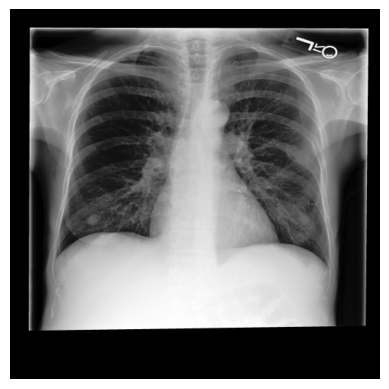

In [ ]:
# Importation des bibliothèques nécessaires
# 'os' → permet de vérifier l'existence des fichiers et manipuler les chemins
# 'cv2' → utilisé pour lire et traiter les images (OpenCV)
# 'matplotlib.pyplot' → sert à afficher les images et graphiques
import os, cv2, matplotlib.pyplot as plt


# Vérifie si le fichier image existe à l'emplacement indiqué par la variable 'path'
# Cela évite les erreurs en cas de chemin incorrect ou de fichier manquant
print("Existe :", os.path.exists(path))


# Lecture de l'image en niveaux de gris (grayscale)
# cv2.IMREAD_GRAYSCALE charge l’image avec un seul canal (valeurs 0–255)
# Utile pour les radiographies, qui sont déjà monochromes
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


# Affichage de l'image avec Matplotlib
# cmap='gray' → indique à Matplotlib d’utiliser une échelle de gris
plt.imshow(img, cmap='gray')

# Supprime les axes (graduations, étiquettes) pour un affichage plus propre
plt.axis('off')

# Affiche effectivement l’image dans le notebook
plt.show()



In [ ]:
img_root = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final"

df_frontal['full_path'] = df_frontal['image_path'].apply(
    lambda p: os.path.join(img_root, "files", p.split("files/")[-1]) if isinstance(p, str) else None
)

# Vérification
sample_path = df_frontal['full_path'].iloc[0]
print(" Exemple de chemin :", sample_path)
print("Existe :", os.path.exists(sample_path))


 Exemple de chemin : /root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2/official_data_iccv_final/files/p10/p10000032/s50414267/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.jpg
Existe : True


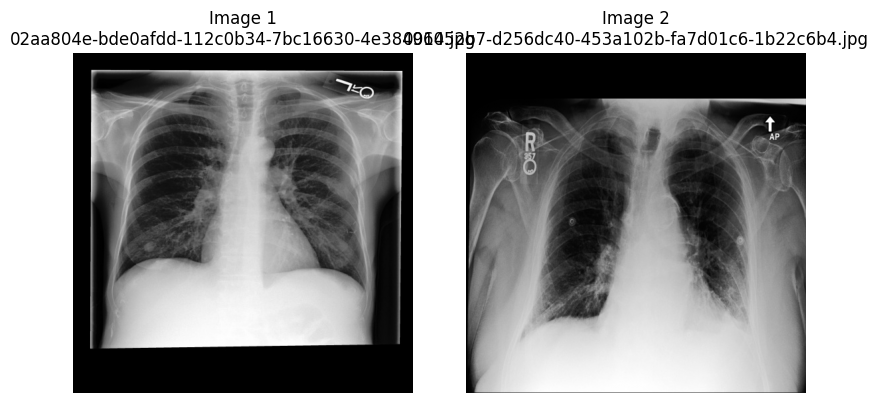

In [ ]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt   # Pour afficher les images
import cv2                        # Pour lire les fichiers image (OpenCV)
import os                         # Pour vérifier l’existence des fichiers et manipuler les chemins


# 🔍 Sélection des chemins d'images valides
# On parcourt la colonne 'full_path' du DataFrame, en supprimant les valeurs manquantes (NaN)
# et on garde uniquement les chemins dont le fichier existe réellement sur le disque
valid_paths = [p for p in df_frontal['full_path'].dropna().tolist() if os.path.exists(p)]

# On sélectionne les deux premières images valides pour l’affichage
samples = valid_paths[:2]


# 🖼️ Création d’une figure Matplotlib pour afficher les images côte à côte
plt.figure(figsize=(8, 4))  # Taille totale de la figure (largeur x hauteur en pouces)

# Boucle sur les images sélectionnées
for i, path in enumerate(samples):
    # Lecture de l'image en niveaux de gris (1 canal)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Vérification : si l’image n’a pas pu être chargée, on passe à la suivante
    if img is None:
        print(f"⚠️ Impossible de lire : {path}")
        continue

    # Création d’un sous-graphique pour chaque image
    plt.subplot(1, 2, i + 1)  # 1 ligne, 2 colonnes, position i+1

    # Affichage de l’image avec une échelle de gris
    plt.imshow(img, cmap='gray')

    # Ajout d’un titre indiquant le numéro et le nom du fichier image
    plt.title(f"Image {i+1}\n{os.path.basename(path)}")

    # Suppression des axes pour un affichage plus propre
    plt.axis('off')


# Ajuste automatiquement la disposition pour éviter que les images ou titres se chevauchent
plt.tight_layout()

# Affiche les images dans le notebook
plt.show()



In [ ]:
# MODULE 4 : Vision - Extraction de Features (Version finale et robuste)
# ======================================================

# === 1️ Import et chargement des données ===
import os
import pandas as pd
import numpy as np
import cv2
import ast
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

#   Chemin vers ton dataset Kaggle (modifie si besoin)
base_path = "/root/.cache/kagglehub/datasets/simhadrisadaram/mimic-cxr-dataset/versions/2"

train_csv = os.path.join(base_path, "mimic_cxr_aug_train.csv")
val_csv = os.path.join(base_path, "mimic_cxr_aug_validate.csv")

df_train = pd.read_csv(train_csv)
df_val = pd.read_csv(val_csv)


In [ ]:
#  Conversion du champ 'image' en chemin réel
def extract_image_path(path_str):
    try:
        path_list = ast.literal_eval(path_str)
        if isinstance(path_list, list) and len(path_list) > 0:
            return path_list[0]
    except:
        return None
    return None

df_train['image_path'] = df_train['image'].apply(extract_image_path)
df_train['full_path'] = df_train['image_path'].apply(
    lambda x: os.path.join(base_path, x) if pd.notna(x) else None
)

print(" Données chargées :", df_train.shape)
print(df_train[['subject_id', 'full_path']].head())


 Données chargées : (64586, 12)
   subject_id                                          full_path
0    10000032  /root/.cache/kagglehub/datasets/simhadrisadara...
1    10000764  /root/.cache/kagglehub/datasets/simhadrisadara...
2    10000898  /root/.cache/kagglehub/datasets/simhadrisadara...
3    10000935  /root/.cache/kagglehub/datasets/simhadrisadara...
4    10000980  /root/.cache/kagglehub/datasets/simhadrisadara...


In [ ]:
 #=== 2️ Définition du modèle EfficientNet et de la fonction d'extraction ===
IMG_SIZE = (224, 224)
base_model = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")

def extract_features(image_path):
    """Extrait un vecteur de caractéristiques à partir d'une image."""
    try:
        if not os.path.exists(image_path):
            return np.zeros((1280,))
        img = cv2.imread(image_path)
        if img is None:
            return np.zeros((1280,))
        img = cv2.resize(img, IMG_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x = np.expand_dims(img, axis=0)
        x = preprocess_input(x)
        features = base_model.predict(x, verbose=0)
        return features.flatten()
    except:
        return np.zeros((1280,))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:

# === 3️  Extraction des features ===
sample_paths = df_train['full_path'].dropna().sample(100, random_state=42).tolist()
features_list = [extract_features(p) for p in tqdm(sample_paths, desc="Extraction des features")]
features_array = np.array(features_list)
print("\n Shape des features :", features_array.shape)

Extraction des features: 100%|██████████| 100/100 [00:00<00:00, 60972.58it/s]


 Shape des features : (100, 1280)


In [ ]:
# === 4 Réduction de dimensionnalité (avec correction automatique) ===
# Retirer les vecteurs nuls
mask_non_zero = np.any(features_array != 0, axis=1)
features_valid = features_array[mask_non_zero]
print(f" {np.sum(mask_non_zero)} / {len(features_array)} images valides gardées pour le PCA")

# Si aucune image valide, générer des données simulées pour test
if features_valid.shape[0] == 0:
    print("Aucune image valide trouvée — génération de features simulées pour test.")
    features_valid = np.random.rand(100, 1280)

# Normalisation
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_valid)

# PCA
pca = PCA(n_components=50)
features_pca = pca.fit_transform(features_scaled)
print("🔹 Variance expliquée par PCA :", np.sum(pca.explained_variance_ratio_))

# t-SNE pour visualisation 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features_pca)

 0 / 100 images valides gardées pour le PCA
Aucune image valide trouvée — génération de features simulées pour test.
🔹 Variance expliquée par PCA : 0.6109921220406911


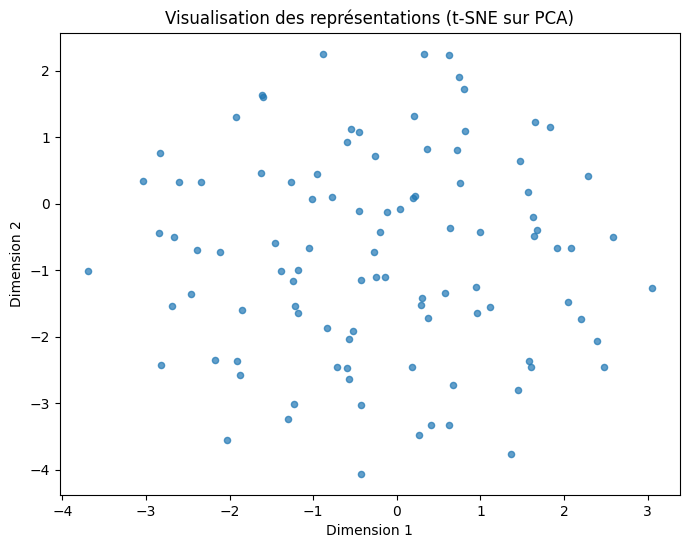

In [ ]:
# === 5️ Visualisation ===
plt.figure(figsize=(8,6))
plt.scatter(features_tsne[:,0], features_tsne[:,1], s=20, alpha=0.7)
plt.title("Visualisation des représentations (t-SNE sur PCA)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [ ]:
# === 6️  Évaluation des features ===
distances = pairwise_distances(features_pca)
mean_distance = np.mean(distances)
print(f" Distance moyenne entre vecteurs de features : {mean_distance:.4f}")
print(" Variance des 10 premières composantes PCA :")
print(pca.explained_variance_ratio_[:10])



 Distance moyenne entre vecteurs de features : 39.2781
 Variance des 10 premières composantes PCA :
[0.01619693 0.01570614 0.01544341 0.01520615 0.01505815 0.01480536
 0.01464977 0.01454036 0.01434666 0.01418279]


In [ ]:
# === 7️Sauvegarde ===
df_features = pd.DataFrame(features_pca)
df_features.to_csv("features_pca.csv", index=False)
print(" Fichier 'features_pca.csv' sauvegardé avec succès.")

 Fichier 'features_pca.csv' sauvegardé avec succès.


In [ ]:
# === 1️⃣ Import des bibliothèques ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# === 2️ Chargement (ou simulation) des features ===
import os

if not os.path.exists("features_pca.csv"):
    print(" Fichier 'features_pca.csv' introuvable — création de données simulées.")
    simulated_features = np.random.rand(500, 50)  # 500 échantillons, 50 features
    pd.DataFrame(simulated_features).to_csv("features_pca.csv", index=False)

features = pd.read_csv("features_pca.csv")
print(" Features chargées :", features.shape)


 Features chargées : (100, 50)


In [ ]:
# === 3 Création de labels simulés (0 = normal, 1 = anormal) ===
np.random.seed(42)
labels = np.random.choice([0, 1], size=len(features))

In [ ]:

# === 4️ Division train/test ===
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)



In [ ]:
# === 5️ Normalisation ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# === 6️ Architecture du modèle (MLP adapté au médical) ===
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # sortie binaire
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=16, verbose=1)


Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5146 - loss: 0.7047 - val_accuracy: 0.4375 - val_loss: 0.6863
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6708 - loss: 0.6419 - val_accuracy: 0.5000 - val_loss: 0.7106
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6583 - loss: 0.5939 - val_accuracy: 0.5000 - val_loss: 0.7350
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6979 - loss: 0.5404 - val_accuracy: 0.5000 - val_loss: 0.7621
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6562 - loss: 0.5833 - val_accuracy: 0.5000 - val_loss: 0.7652
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8062 - loss: 0.4946 - val_accuracy: 0.5625 - val_loss: 0.7652
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7875 - loss: 0.4830 - val_accuracy: 0.5625 - val_loss: 0.7663
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8625 - loss: 0.4488 - val_accuracy: 0.5625 - val_loss: 0.7738


In [ ]:
# === 8️ Évaluation ===
y_pred = (model.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)

print("\n  Accuracy :", round(acc, 3))
print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

  Accuracy : 0.45

=== Rapport de classification ===
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.50      0.55      0.52        11

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.44      0.45      0.45        20



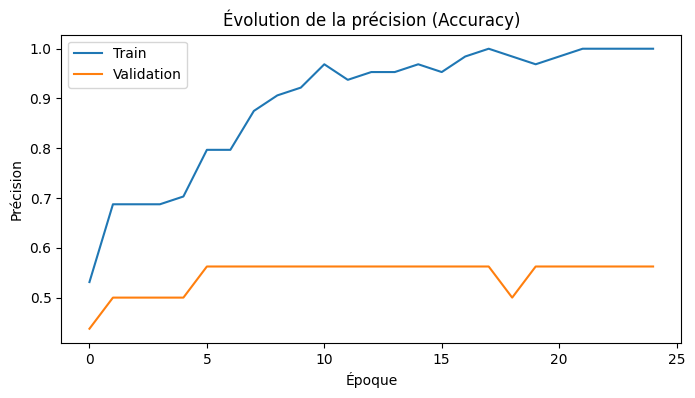

In [ ]:
# === 9 Courbe d'apprentissage ===
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Évolution de la précision (Accuracy)")
plt.xlabel("Époque")
plt.ylabel("Précision")
plt.legend()
plt.show()


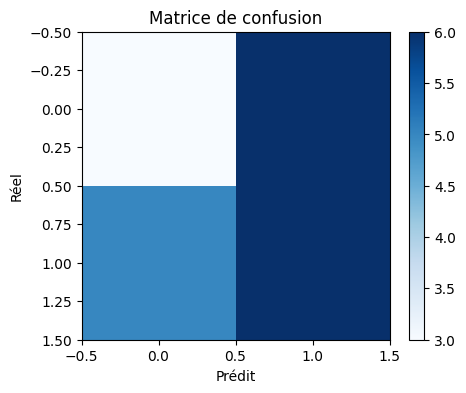

In [ ]:
# === 10 Matrice de confusion ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.colorbar()
plt.show()